## Imports

In [1]:
from random import randint
import typing

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

## Euler's Method vs. Euler-Cromer's method

#### Euler's Method
$$
\begin{align}
    x(t_i + \Delta t) & \approx x(t_i) + v(t_i) \cdot \Delta t \\
    v(t_i + \Delta t) & \approx v(t_i) + a(t_i, x(t_i), v(t_i)) \cdot \Delta t
\end{align}
$$

#### Euler-Cromer Method
$$
\begin{align}
  x(t_i + \Delta t) & \approx x(t_i) + v(t_i + \Delta t) \cdot \Delta t \\
  v(t_i + \Delta t) & \approx v(t_i) + a(t_i, x(t_i), v(t_i)) \cdot \Delta t
\end{align}
$$

### Falling Tennis Ball
The acceleration of a falling body with air resistance is given by

$$
  a = \frac{dv}{dt} = -g - D v |v|
$$

* For a tennis ball we have $ D = 0.0245m^{-1} $

The equations of motion for the ball being dropped would then be ...
$$
  y(t) = y_0 - \frac{1}{2}(g + Dv|v|)t^2 \\
  v_y(t) = - (g + Dv|v|)t
$$

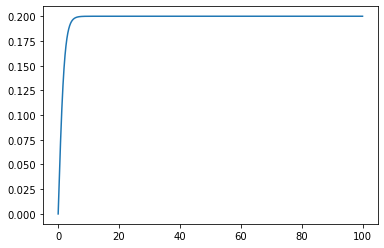

In [30]:
D = 0.0245 # m^-1
g = 9.8 # m / s^2
y_0 = 2.0
v_0 = 0.0
dt = 1e-2

time = 100 # s

def a_i(v_i:float, D=D, g=g) -> float:
    return -g - D * v_i * abs(v_i)

def plots(D=D, g=g, y_0=y_0, v_0=v_0, dt=dt, time=time):
    n = int(np.ceil(time/dt))
    y_e = np.zeros(n)     # Euler
    y_ec = np.zeros(n)    # Euler-Cromer
    v = np.zeros(n)
    a = np.zeros(n)
    t = np.arange(0, time, dt)

    y_e[0] = y_ec[0] = y_0
    v[0] = v_0
    for i in range(n - 1):
        a[i] = a_i(v[i], D=D, g=g)
        v[i + 1] = v[i] + a[i] * dt
        y_e[i + 1] = y_e[i] + v[i] * dt
        y_ec[i + 1] = y_ec[i] + v[i+1] * dt
        
    a[n - 1] = a_i(v[n - 1], D=D, g=g)
    
    plt.plot(t, y_e - y_ec)
#     plt.plot(t, y_e)
#     plt.plot(t, y_ec)
#     plt.plot(t, v)
#     plt.plot(t, a)
    plt.show()
        
        
plots()

## TODO
# Subplot
# Legends
# Interactivity
# Compare both methods to the analytical solution.
# What are other problems have analytical solutions that you can model and compare resutls to?
